# Parallel Node Execution
- Goal: Building Multi Agent workflows

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

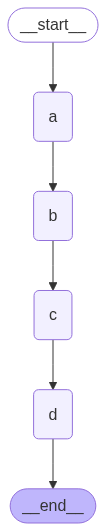

In [4]:
from IPython.display import Image, display
import operator
from typing import Annotated, Any
from pydantic import BaseModel, Field
from langgraph.graph import START, StateGraph, END


class State(BaseModel):
    state:list[str] = Field(description="The state of the graph")

class ReturnNodeValue:
    def __init__(self, node_secret:str):
        self._value = node_secret
    
    def __call__(self, state:State)->Any:
        print(f"Adding : {self._value} to {state.state}")
        return {"state":[self._value]}
    
# add nodes
builder = StateGraph(State)
builder.add_node("a", ReturnNodeValue("I am in a"))
builder.add_node("b", ReturnNodeValue("I am in b"))
builder.add_node("c", ReturnNodeValue("I am in c"))
builder.add_node("d", ReturnNodeValue("I am in d"))

# add edges
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", "c")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

# display graph
display(Image(graph.get_graph().draw_mermaid_png()))



In [5]:
graph.invoke({"state":[]})

Adding : I am in a to []
Adding : I am in b to ['I am in a']
Adding : I am in c to ['I am in b']
Adding : I am in d to ['I am in c']


{'state': ['I am in d']}

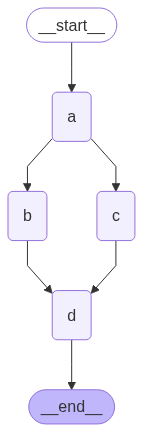

Adding : I am in a to []
Adding : I am in b to ['I am in a']
Adding : I am in c to ['I am in a']
Adding : I am in d to ['I am in a', 'I am in b', 'I am in c']


{'state': ['I am in a', 'I am in b', 'I am in c', 'I am in d']}

In [8]:
# now let's run b and c in parallel

class State(BaseModel):
    state:Annotated[list[str], operator.add] = Field(description="The state of the graph")

class ReturnNodeValue:
    def __init__(self, node_secret:str):
        self._value = node_secret
    
    def __call__(self, state:State)->Any:
        print(f"Adding : {self._value} to {state.state}")
        return {"state":[self._value]}
# add nodes
builder = StateGraph(State)
builder.add_node("a", ReturnNodeValue("I am in a"))
builder.add_node("b", ReturnNodeValue("I am in b"))
builder.add_node("c", ReturnNodeValue("I am in c"))
builder.add_node("d", ReturnNodeValue("I am in d"))

# add edges
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

# display graph
display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke({"state":[]})

In [ ]:
# now let's run b and c in parallel

class State(BaseModel):
    state:Annotated[list[str], operator.add] = Field(description="The state of the graph")

class ReturnNodeValue:
    def __init__(self, node_secret:str):
        self._value = node_secret
    
    def __call__(self, state:State)->Any:
        print(f"Adding : {self._value} to {state.state}")
        return {"state":[self._value]}
# add nodes
builder = StateGraph(State)
builder.add_node("a", ReturnNodeValue("I am in a"))
builder.add_node("b", ReturnNodeValue("I am in b"))
builder.add_node("b2", ReturnNodeValue("I am in b2"))
builder.add_node("c", ReturnNodeValue("I am in c"))
builder.add_node("d", ReturnNodeValue("I am in d"))

# add edges
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

# display graph
display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke({"state":[]})